<a href="https://colab.research.google.com/github/faisalnawazmir/Econometrics-ML_for_Finance/blob/main/chapter_5_GARCH_edited.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
import matplotlib.pyplot as plt
import warnings

plt.style.use('seaborn')
# plt.style.use('seaborn-colorblind') #alternative
plt.rcParams['figure.figsize'] = [8, 4.5]
plt.rcParams['figure.dpi'] = 300
warnings.simplefilter(action='ignore', category=FutureWarning)

# Volatility Forecasting

## Explaining stock returns' volatility with ARCH models

### How to do it...

1. Import the libraries:

In [ ]:
# pip install --upgrade pip
#!pip install yfinance --use-feature=2020-resolver
!pip install yfinance

!pip install arch

     |████████████████████████████████| 5.5MB 5.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22618 sha256=0d715cc8ba67b02fec5e5e75bc14c828310ba619b92d607d63fd06327b263f84
  Stored in directory: /root/.cache/pip/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
     |████████████████████████████████| 798kB 2.8MB/s 


In [ ]:
import pandas as pd
import yfinance as yf
from arch import arch_model

2. Specify the risky asset and the time horizon:

In [ ]:
RISKY_ASSET = 'GOOG'
START_DATE = '2015-01-01'
END_DATE = '2018-12-31'

3. Download data from Yahoo Finance:

In [ ]:
df = yf.download(RISKY_ASSET,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  1 of 1 completed
Downloaded 1005 rows of data.


4. Calculate daily returns:

Average return: 0.08%


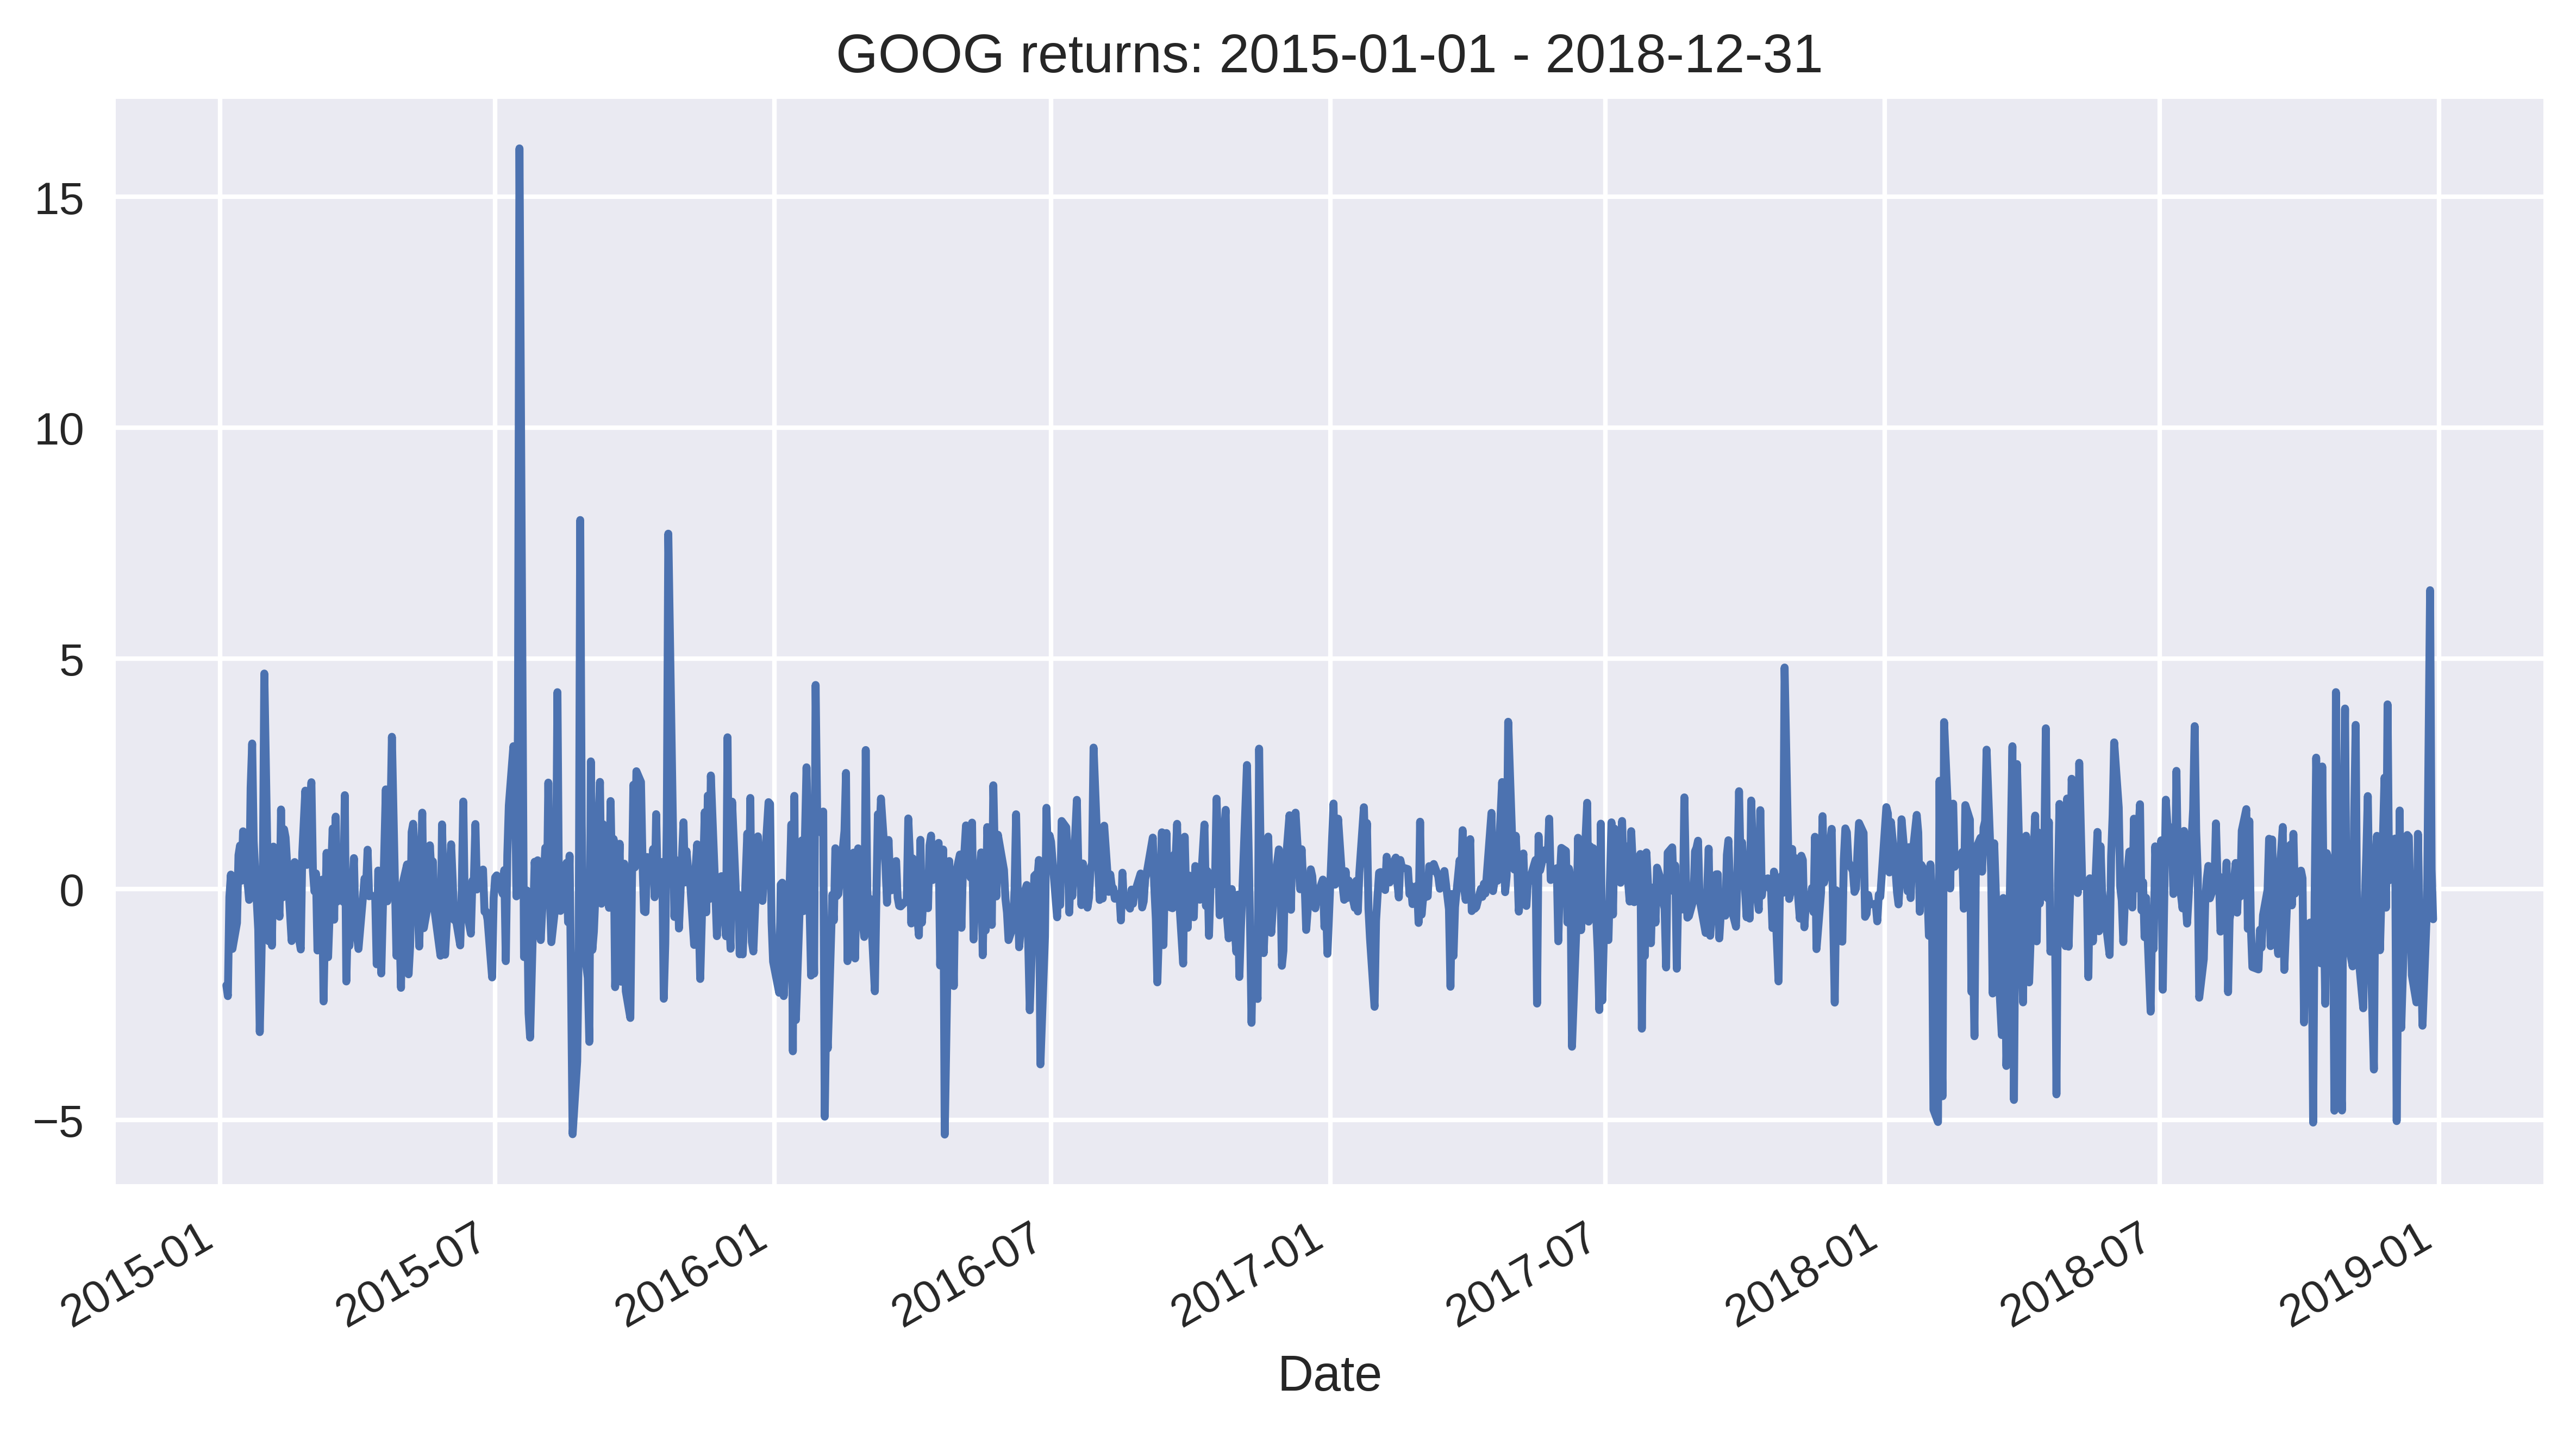

In [ ]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.name = 'asset_returns'
print(f'Average return: {round(returns.mean(), 2)}%')
returns.plot(title=f'{RISKY_ASSET} returns: {START_DATE} - {END_DATE}');

plt.tight_layout()
# plt.savefig('images/ch5_im1.png')
plt.show()

5. Specify the ARCH model:

In [ ]:
model = arch_model(returns, mean='Zero', vol='ARCH', p=1, o=0, q=0)

6. Estimate the model and print the summary:

In [ ]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                       ARCH   Log-Likelihood:               -1799.00
Distribution:                  Normal   AIC:                           3602.00
Method:            Maximum Likelihood   BIC:                           3611.83
                                        No. Observations:                 1004
Date:                Thu, Oct 22 2020   Df Residuals:                     1002
Time:                        04:24:12   Df Model:                            2
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          1.6292      0.167      9.736  2.128e-22   [  1.30

7. Plot the residuals and the conditional volatility:

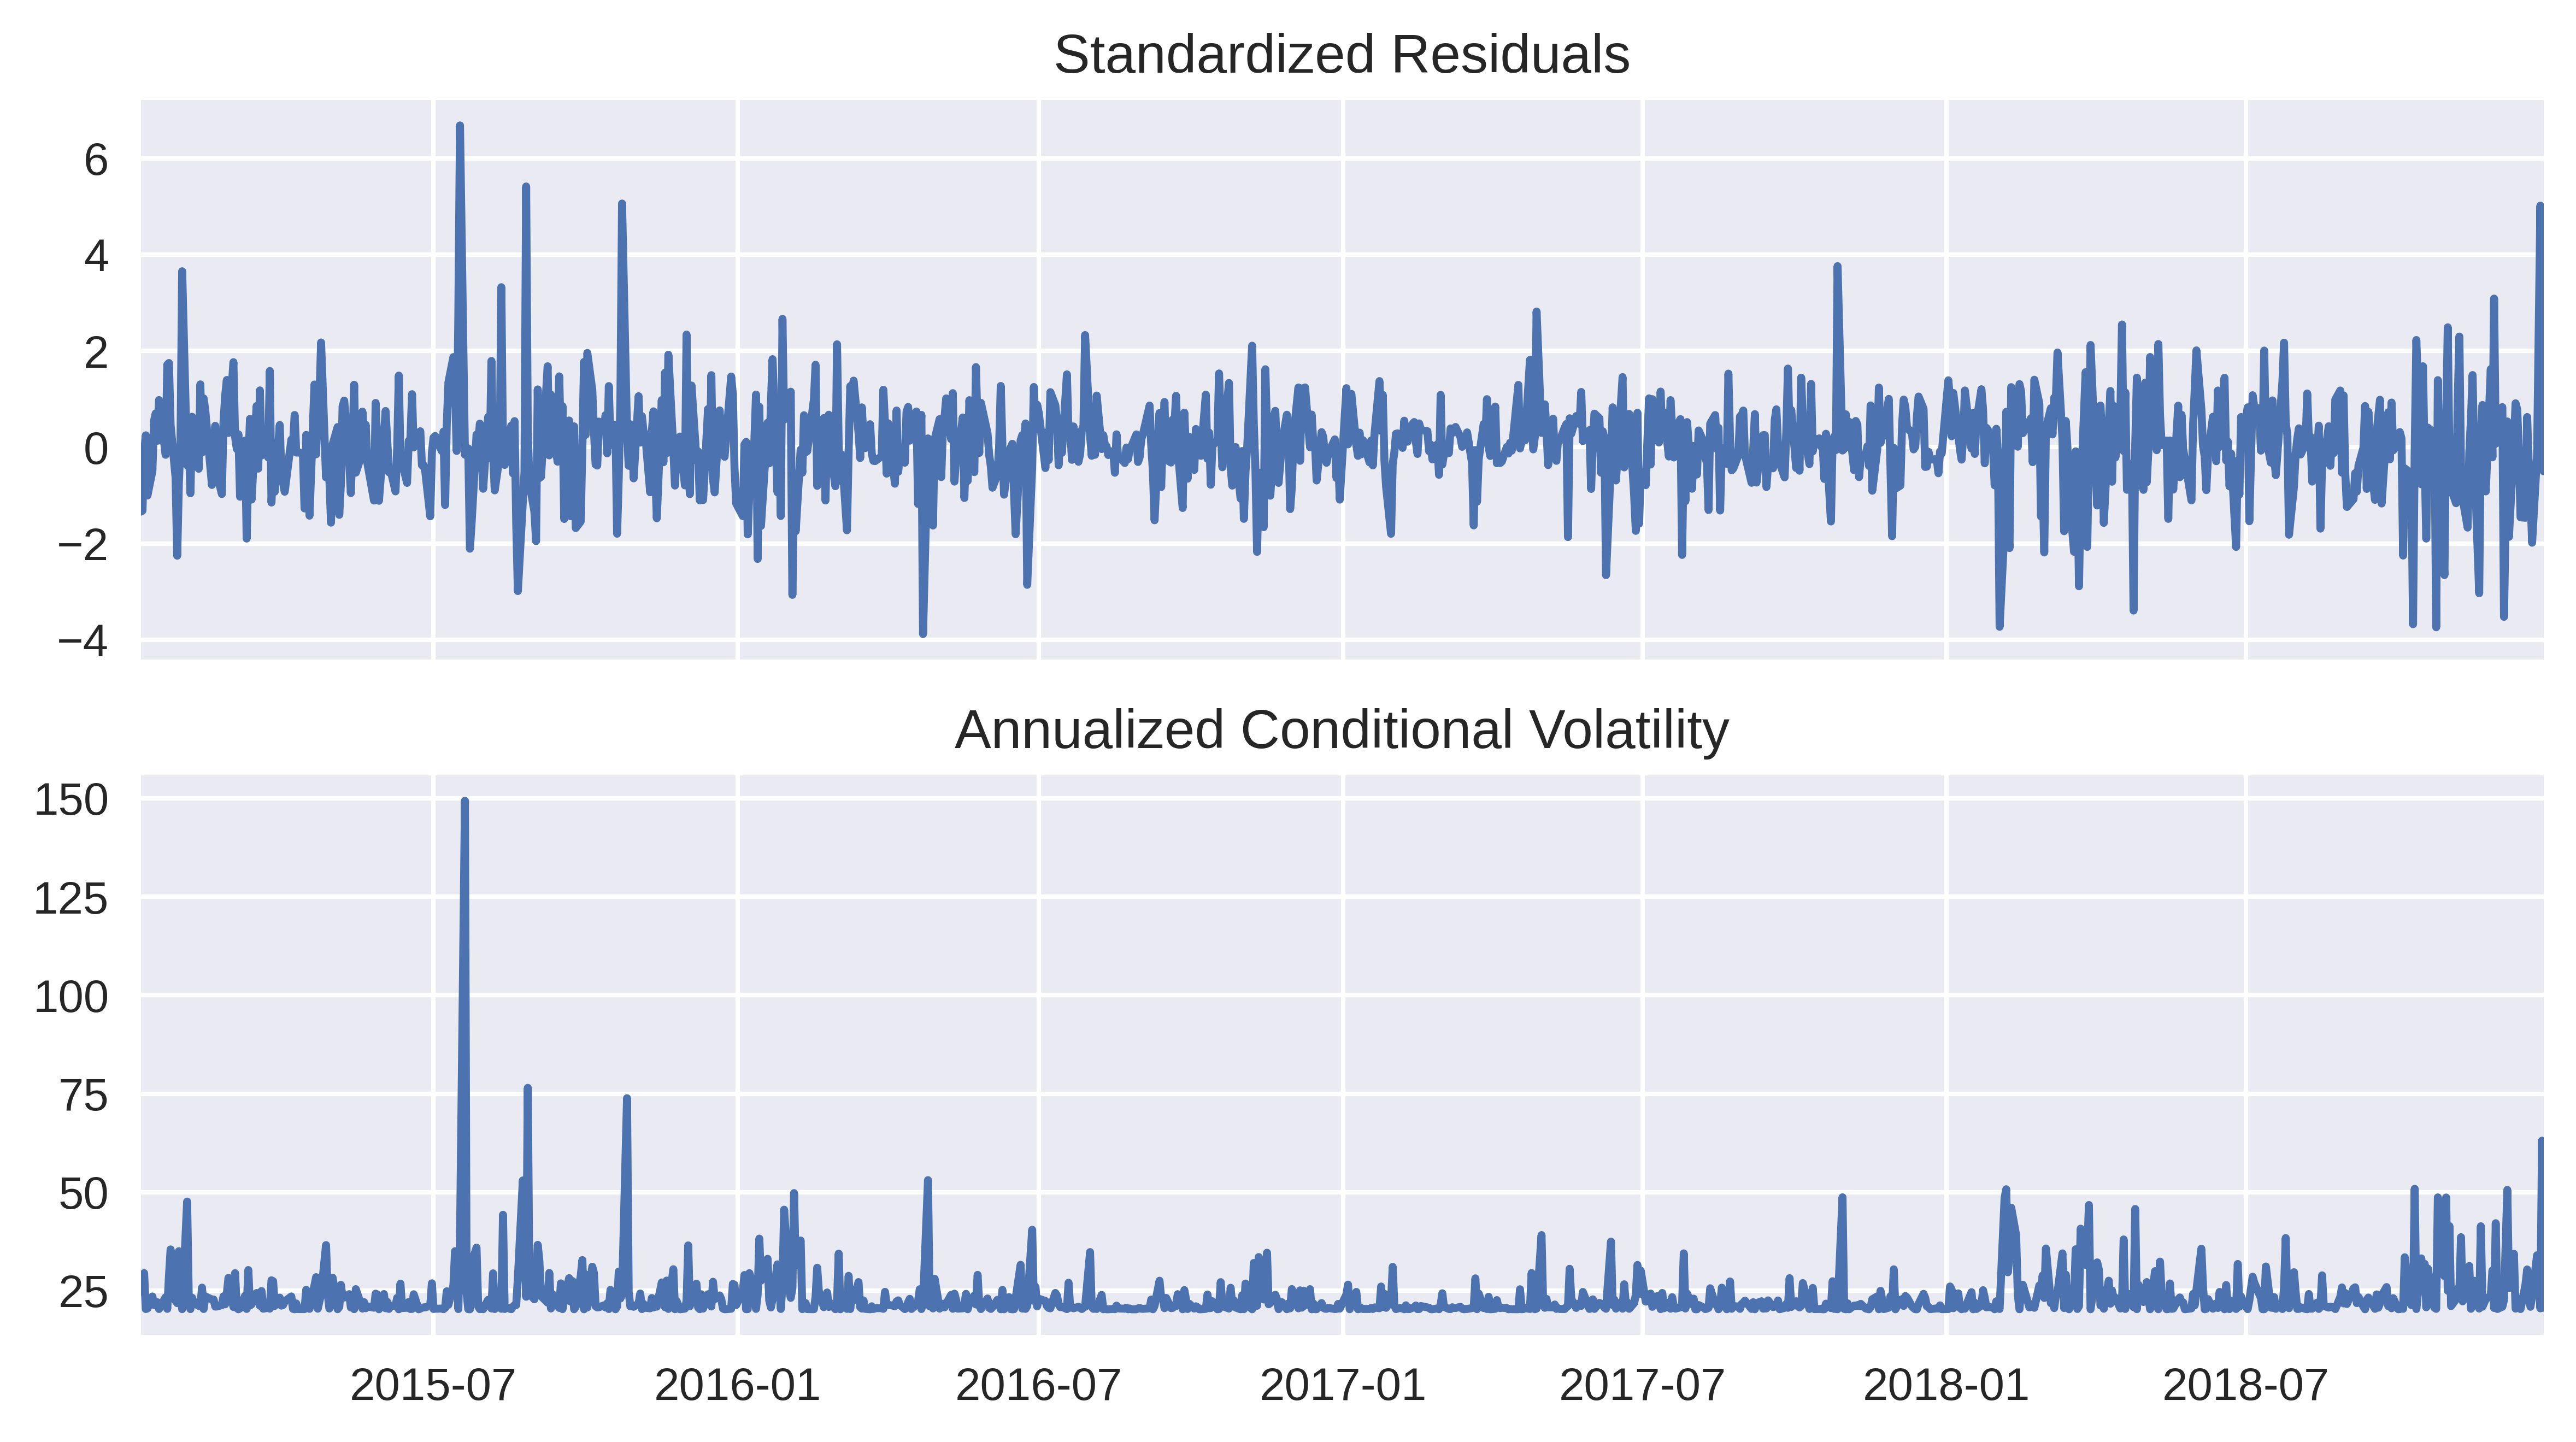

In [ ]:
model_fitted.plot(annualize='D')

plt.tight_layout()
# plt.savefig('images/ch5_im3.png')
plt.show()

## Explaining stock returns' volatility with GARCH models

### How to do it...

1. Specify the GARCH model:

In [ ]:
model = arch_model(returns, mean='Zero', vol='GARCH', 
                   p=1, o=0, q=1)

2. Estimate the model and print the summary:

In [ ]:
model_fitted = model.fit(disp='off')
print(model_fitted.summary())

                       Zero Mean - GARCH Model Results                        
Dep. Variable:          asset_returns   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.001
Vol Model:                      GARCH   Log-Likelihood:               -1763.46
Distribution:                  Normal   AIC:                           3532.92
Method:            Maximum Likelihood   BIC:                           3547.66
                                        No. Observations:                 1004
Date:                Thu, Oct 22 2020   Df Residuals:                     1001
Time:                        04:24:35   Df Model:                            3
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega          0.1793      0.160      1.120      0.263    [ -

3. Plot the residuals and the conditional volatility:

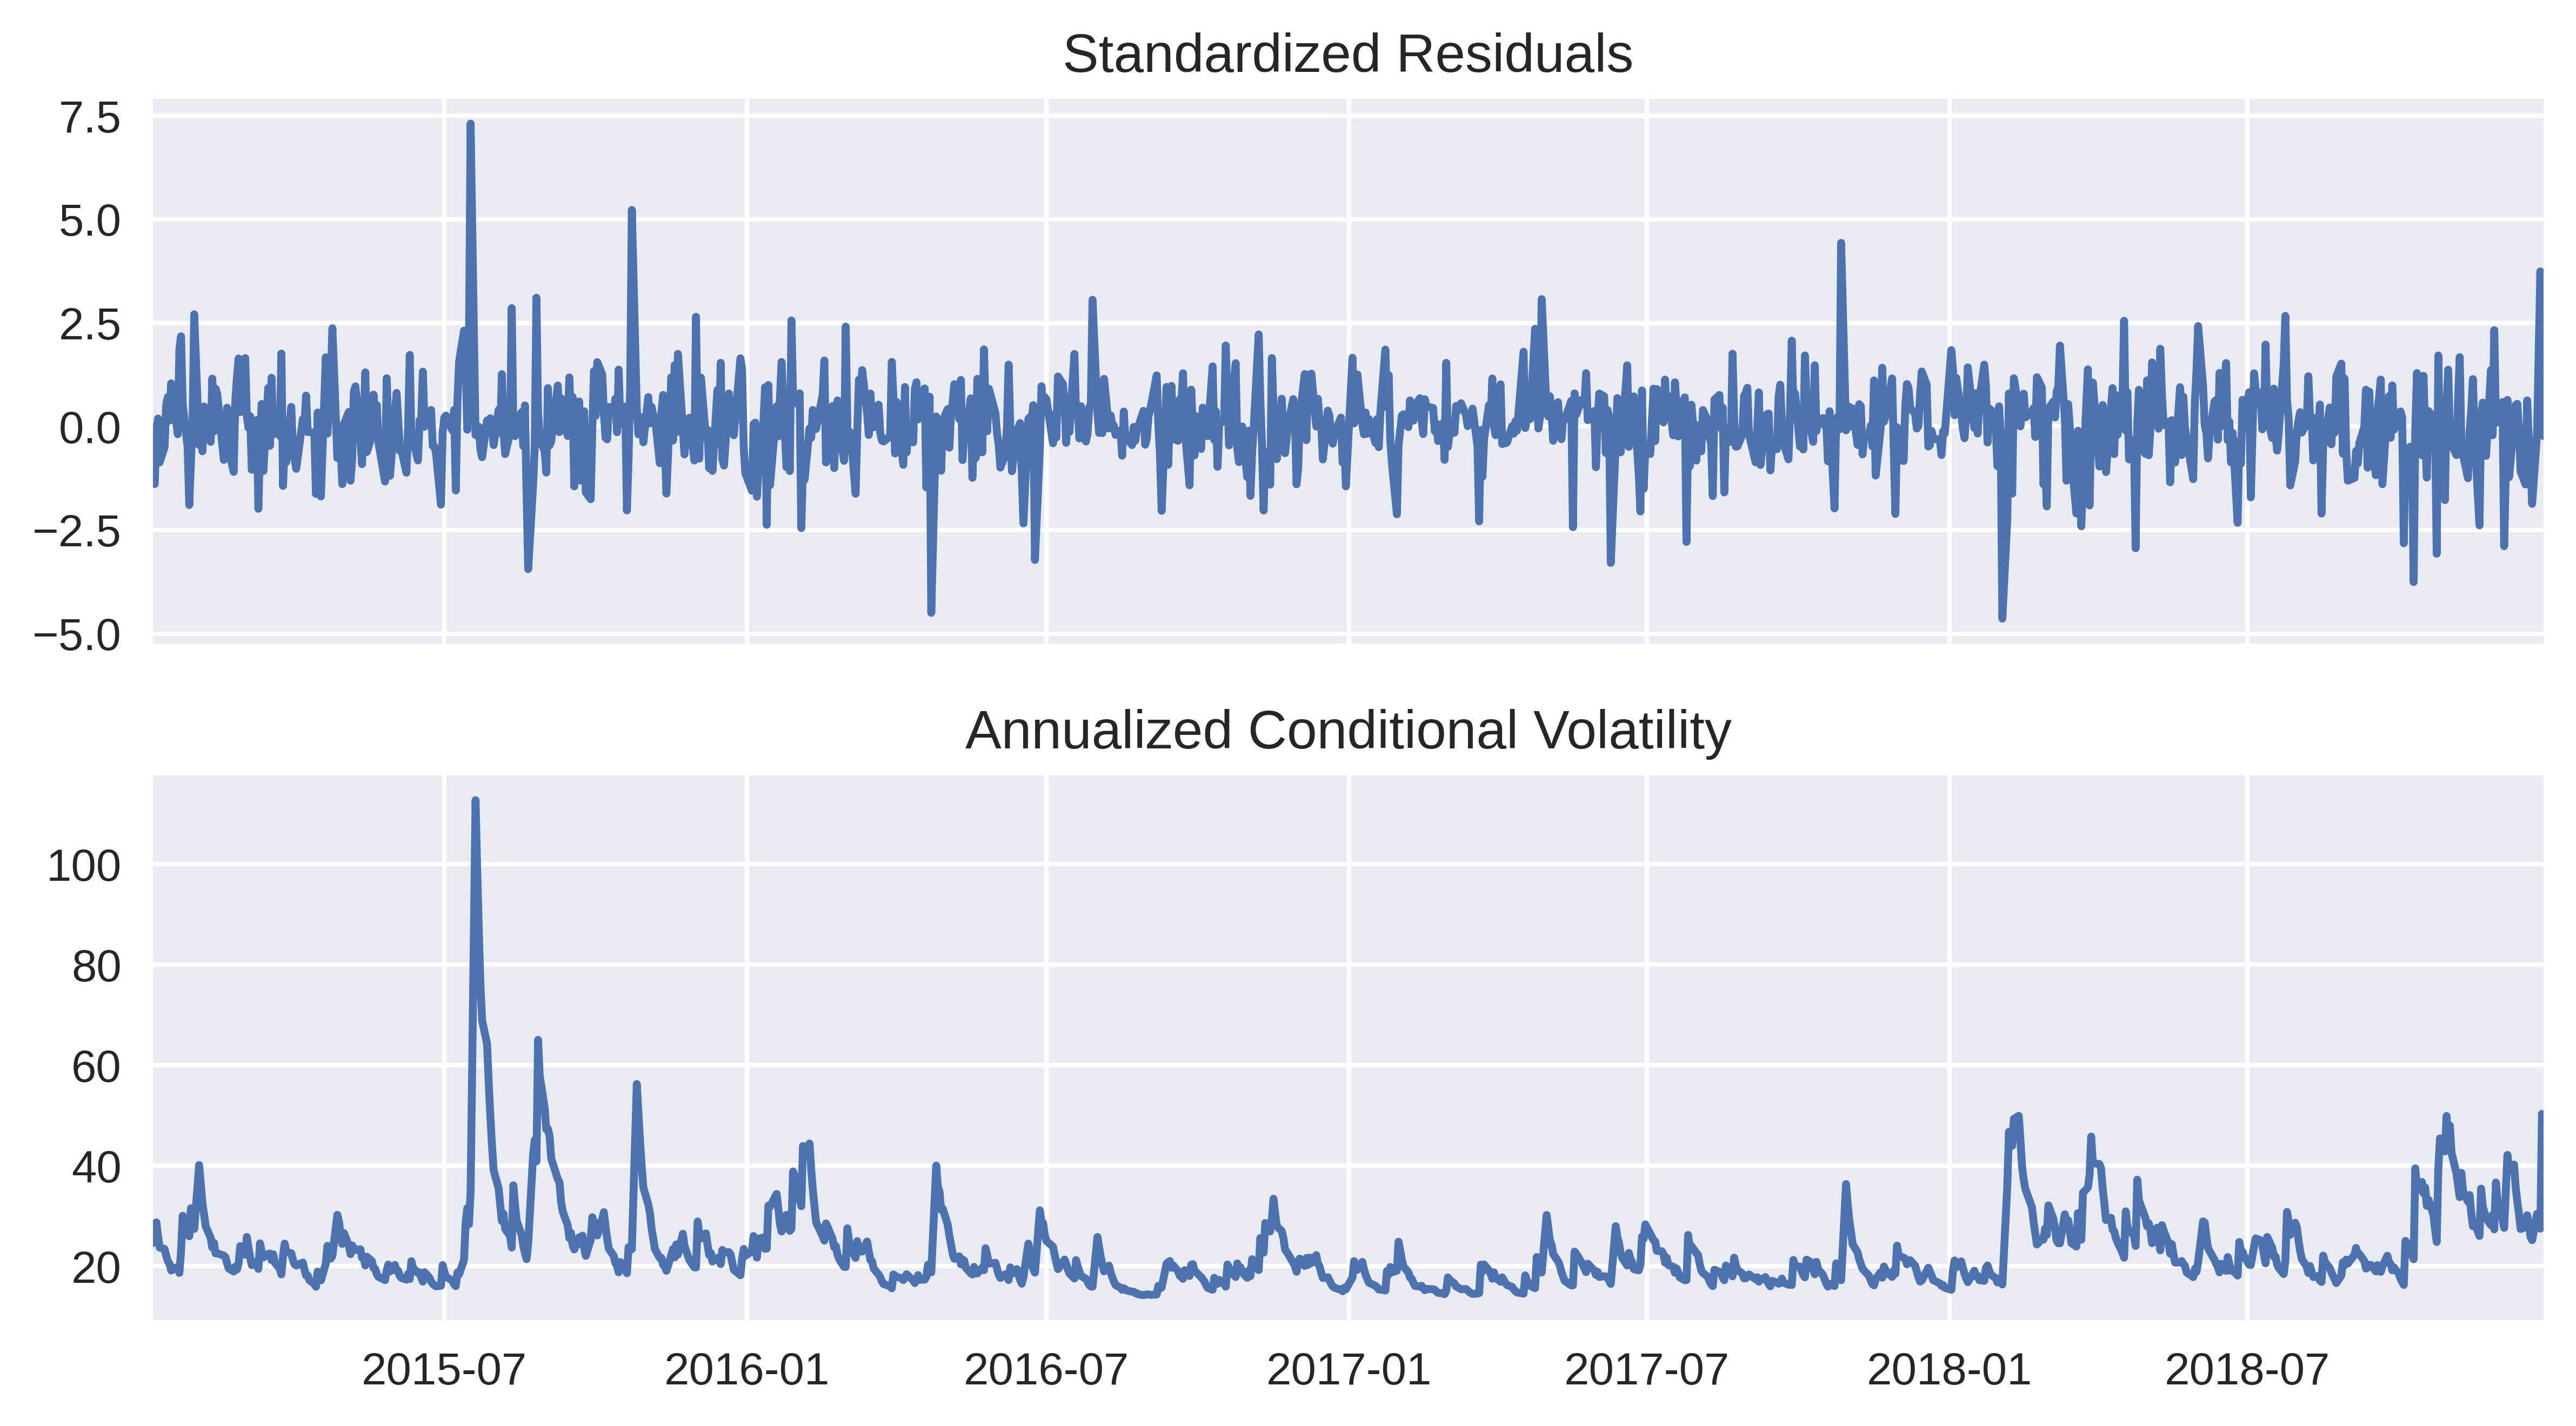

In [ ]:
model_fitted.plot(annualize='D')

plt.tight_layout()
# plt.savefig('images/ch5_im5.png')
plt.show()

## Implementing CCC-GARCH model for multivariate volatility forecasting

### How to do it...

1. Import the libraries:

In [ ]:
import pandas as pd
import yfinance as yf
from arch import arch_model

2. Specify the risky asset and the time horizon:

In [ ]:
RISKY_ASSETS = ['GOOG', 'MSFT', 'AAPL']
N = len(RISKY_ASSETS)
START_DATE = '2015-01-01'
END_DATE = '2018-12-31'

3. Download data from Yahoo Finance:

In [ ]:
df = yf.download(RISKY_ASSETS,
                 start=START_DATE,
                 end=END_DATE,
                 adjusted=True)

print(f'Downloaded {df.shape[0]} rows of data.')

[*********************100%***********************]  3 of 3 completed
Downloaded 1005 rows of data.


4. Calculate daily returns:

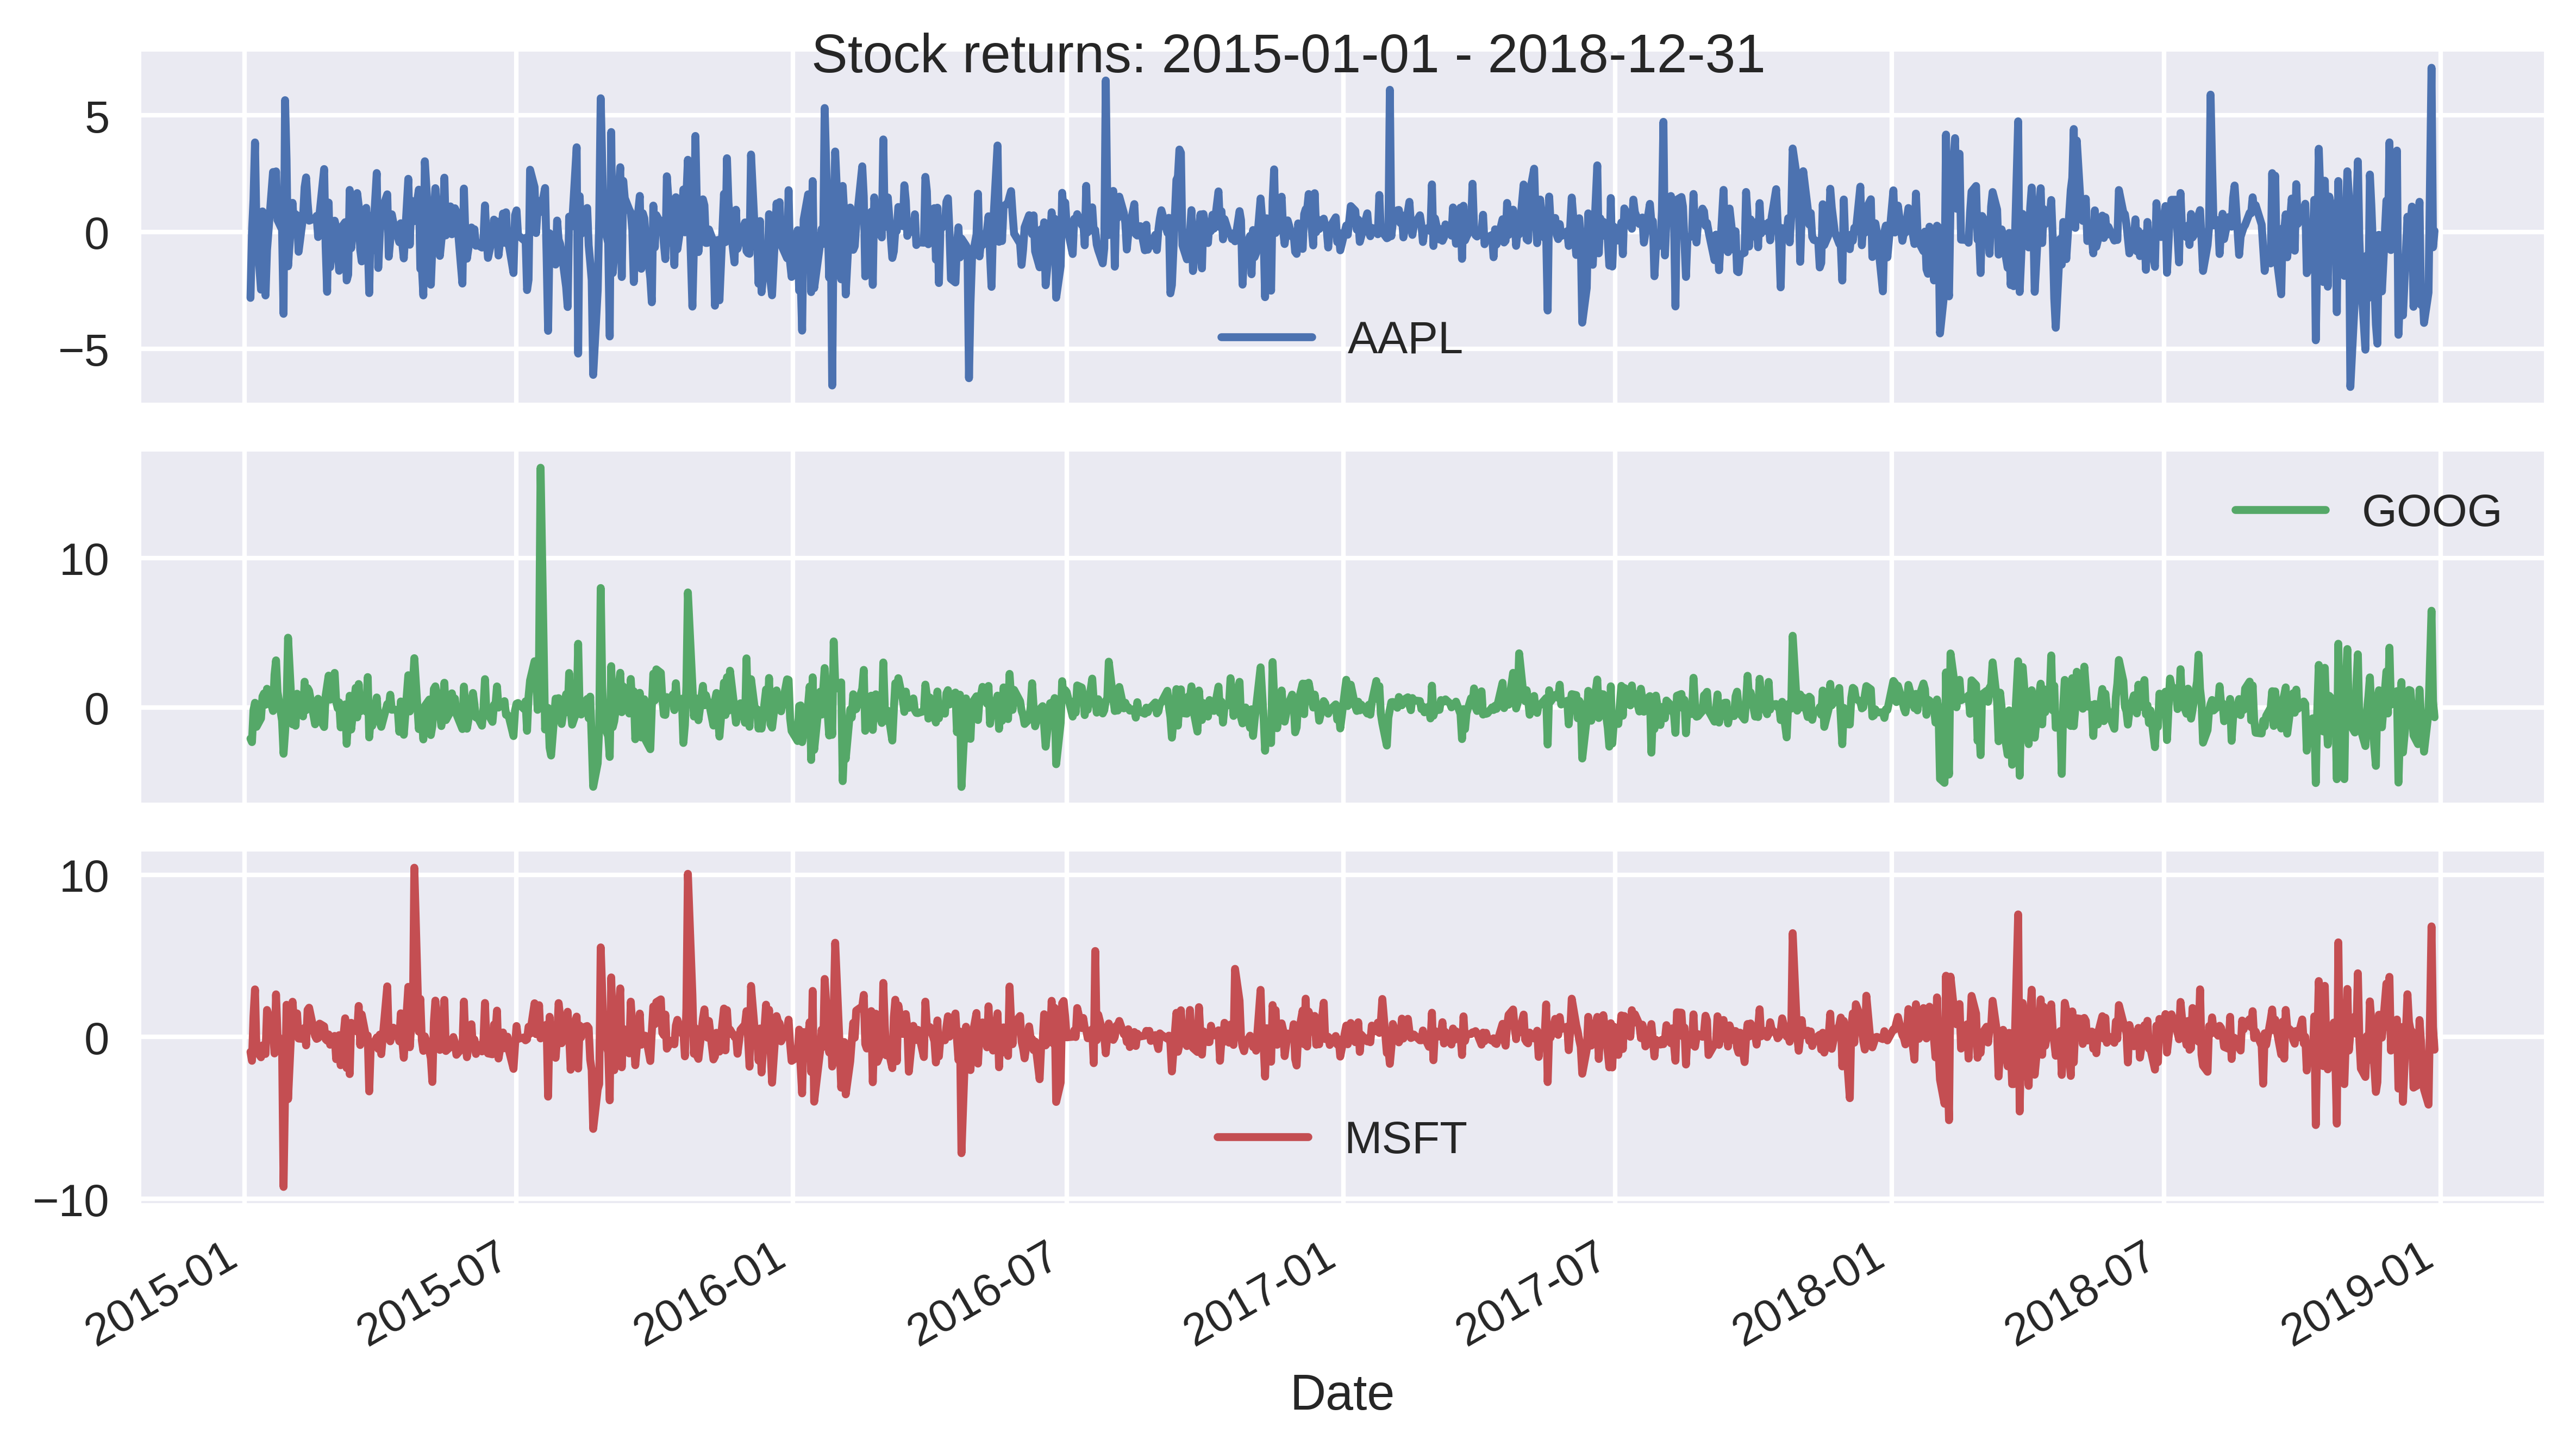

In [ ]:
returns = 100 * df['Adj Close'].pct_change().dropna()
returns.plot(subplots=True, 
             title=f'Stock returns: {START_DATE} - {END_DATE}')

plt.tight_layout()
# plt.savefig('images/ch5_im6.png')
plt.show()

5. Define lists for storing objects:

In [ ]:
coeffs = []
cond_vol = []
std_resids = []
models = []

6. Estimate the univariate GARCH models:

In [ ]:
for asset in returns.columns:
    # specify and fit the model
    model = arch_model(returns[asset], mean='Constant', 
                       vol='GARCH', p=1, o=0, q=1).fit(update_freq=0, 
                                                       disp='off');
    # store results in the lists 
    coeffs.append(model.params)
    cond_vol.append(model.conditional_volatility)
    std_resids.append(model.resid / model.conditional_volatility)
    models.append(model)

7. Store the results in DataFrames:

In [ ]:
coeffs_df = pd.DataFrame(coeffs, index=returns.columns)
cond_vol_df = pd.DataFrame(cond_vol).transpose() \
                                    .set_axis(returns.columns, 
                                              axis='columns', 
                                              inplace=False)
std_resids_df = pd.DataFrame(std_resids).transpose() \
                                        .set_axis(returns.columns, 
                                                  axis='columns', 
                                                  inplace=False)

In [ ]:
coeffs_df

,mu,omega,alpha[1],beta[1]
AAPL,0.123494,0.221224,0.125915,0.784531
GOOG,0.080485,0.193127,0.187875,0.747864
MSFT,0.119526,0.384324,0.251946,0.625822


8. Calculate the constant conditional correlation matrix (R):

In [ ]:
R = std_resids_df.transpose() \
                 .dot(std_resids_df) \
                 .div(len(std_resids_df))

In [ ]:
import numpy as np

9. Calculate the 1-step ahead forecast of the conditional covariance matrix :

In [ ]:
# define objects
diag = []
D = np.zeros((N, N))

# populate the list with conditional variances
for model in models:
    diag.append(model.forecast(horizon=1).variance.values[-1][0])
# take the square root to obtain volatility from variance
diag = np.sqrt(np.array(diag))
# fill the diagonal of D with values from diag
np.fill_diagonal(D, diag)

# calculate the conditional covariance matrix
H = np.matmul(np.matmul(D, R.values), D)

In [ ]:
H

array([[6.9856654 , 3.26777319, 3.73976482],
       [3.26777319, 6.15754042, 4.47771115],
       [3.73976482, 4.47771115, 7.52626428]])

## Forecasting the conditional covariance matrix using DCC-GARCH

### How to do it...

1. Import the libraries:

In [ ]:
import pandas as pd

In [ ]:
#pip install rpy2
#returns = 100 * df['Adj Close'].pct_change().dropna()
returns.head()

,AAPL,GOOG,MSFT
Date,,,
2015-01-05,-2.817169,-2.084573,-0.919576
2015-01-06,0.009443,-2.317705,-1.467744
2015-01-07,1.402221,-0.171326,1.270526
2015-01-08,3.842234,0.315308,2.941811
2015-01-09,0.107220,-1.295061,-0.840514


In [ ]:
%load_ext rpy2.ipython

/usr/local/lib/python3.6/dist-packages/rpy2/robjects/pandas2ri.py:34: UserWarning: pandas >= 1.0 is not supported.
  warnings.warn('pandas >= 1.0 is not supported.')


In [ ]:

#! sudo apt-get install libgmp-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
E: Unable to locate package nloptr-dev


2. Install `rmgarch` R package (run only once) and load it:

In [ ]:
%%R
#setRepositories()
#install.packages('rmgarch', dependencies=TRUE, repos = "http://cran.us.r-project.org")
install.packages('rmgarch')
#library(rmgarch)

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: also installing the dependencies ‘Rmpfr’, ‘Bessel’


R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/Rmpfr_0.8-1.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 643329 bytes (628 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [ ]:
#%%R
#.libPaths()

In [ ]:
%%R
library(rmgarch)

R[write to console]: Error in library(rmgarch) : there is no package called ‘rmgarch’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: 
R[write to console]: In install.packages("rmgarch") :
R[write to console]: 
 
R[write to console]:  installation of package ‘gmp’ had non-zero exit status

R[write to console]: 2: 
R[write to console]: In install.packages("rmgarch") :
R[write to console]: 
 
R[write to console]:  installation of package ‘Rmpfr’ had non-zero exit status

R[write to console]: 3: 
R[write to console]: In install.packages("rmgarch") :
R[write to console]: 
 
R[write to console]:  installation of package ‘Bessel’ had non-zero exit status

R[write to console]: 4: 
R[write to console]: In install.packages("rmgarch") :
R[write to console]: 
 
R[write to console]:  installation of package ‘rmgarch’ had non-zero exit status




Error in library(rmgarch) : there is no package called ‘rmgarch’
Calls: <Anonymous> -> <Anonymous> -> withVisible -> library


3. Import the dataset into R:

In [ ]:
%%R -i returns
print(head(returns, 5))


                            AAPL       GOOG       MSFT
2015-01-05 00:00:00 -2.817169387 -2.0845731 -0.9195763
2015-01-06 00:00:00  0.009442765 -2.3177049 -1.4677442
2015-01-07 00:00:00  1.402220508 -0.1713264  1.2705261
2015-01-08 00:00:00  3.842233845  0.3153082  2.9418111
2015-01-09 00:00:00  0.107220316 -1.2950608 -0.8405139


4. Define the model specification:

In [ ]:
%%R
n=3

In [ ]:
%%R

# define GARCH(1,1) model
univariate_spec <- ugarchspec(mean.model = list(armaOrder = c(0,0)),
                              variance.model = list(garchOrder = c(1,1), 
                                                    model = "sGARCH"),
                              distribution.model = "norm")

# define DCC(1,1) model
#n <-dim(returns)[2]
dcc_spec <- dccspec(uspec = multispec(replicate(n, univariate_spec)),
                    dccOrder = c(1,1),
                    distribution = "mvnorm")

dcc_spec

R[write to console]: Error in ugarchspec(mean.model = list(armaOrder = c(0, 0)), variance.model = list(garchOrder = c(1,  : 
  could not find function "ugarchspec"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in ugarchspec(mean.model = list(armaOrder = c(0, 0)), variance.model = list(garchOrder = c(1,  : 
  could not find function "ugarchspec"
Calls: <Anonymous> -> <Anonymous> -> withVisible


5. Estimate the model:

In [ ]:
%%R
dcc_fit <- dccfit(dcc_spec, data=returns)
dcc_fit

R[write to console]: Error in dccfit(dcc_spec, data = returns) : 
  could not find function "dccfit"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in dccfit(dcc_spec, data = returns) : 
  could not find function "dccfit"
Calls: <Anonymous> -> <Anonymous> -> withVisible


6. Calculate the 5-step ahead forecasts:

In [ ]:
%%R
forecasts <- dccforecast(dcc_fit, n.ahead = 5)

R[write to console]: Error in dccforecast(dcc_fit, n.ahead = 5) : 
  could not find function "dccforecast"
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in dccforecast(dcc_fit, n.ahead = 5) : 
  could not find function "dccforecast"
Calls: <Anonymous> -> <Anonymous> -> withVisible


7. Access the forecasts:

In [ ]:
%%R

# conditional covariance matrix
forecasts@mforecast$H
# conditional correlation matrix
forecasts@mforecast$R
# proxy correlation process
forecasts@mforecast$Q
# conditional mean forecasts
forecasts@mforecast$mu

R[write to console]: Error in withVisible({ : object 'forecasts' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible




Error in withVisible({ : object 'forecasts' not found
Calls: <Anonymous> -> <Anonymous> -> withVisible


### There's more

In [ ]:
%%R

# parallelized DCC-GARCH(1,1)

library('parallel')

# set up the cluster
cl <- makePSOCKcluster(3)

# define parallelizable specification
parallel_fit <- multifit(multispec(replicate(n, univariate_spec)), 
                         returns, 
                         cluster = cl)

# fit the DCC-GARCH model
dcc_fit <- dccfit(dcc_spec, 
                  data = returns, 
                  fit.control = list(eval.se = TRUE), 
                  fit = parallel_fit, 
                  cluster = cl)

# stop the cluster
stopCluster(cl)